# Overview

With the proliferation of online ordering, understanding visitor’s spending habits can help relevant decision makers such as inventory analysts and product development teams to best manage and design product offerings to best increase positive customer ratings. Looking into attributes such as product price and stock quantity and seeing how they can influence average customer ratings. 

This data collected from Amazon was uploaded to Kaggle by user ‘The Devastator’. The follow is a data dictionary listing and describing the attributes in the data file.

- product_name: The name of the product. (String)
- manufacturer: The manufacturer of the product. (String)
- price: The price of the product in British Pounds. (String)
- number_available_in_stock: The number of the product available in stock. (String)
- number_of_reviews: The number of reviews for the product. (Integer)
- number_of_answered_questions: The number of questions answered for the product. (Integer)
- average_review_rating: The average review rating for the product. (String)
- amazon_category_and_sub_category: The Amazon category and subcategory for the product. (String)
- customers_who_bought_this_item_also_bought: The customers who bought this item also bought. (String)
- description: The description of the product. (String)
- product_information: The product information. (String)
- product_description: The product description. (String)
- items_customers_buy_after_viewing_this_item: The items customers buy after viewing this item. (String)
- customer_questions_and_answers: The customer questions and answers. (String)
- customer_reviews: The customer reviews. (String)
- sellers: The sellers. (String)

Source: https://www.kaggle.com/datasets/thedevastator/fashion-products-on-amazon-ratings-prices-and-pa


# Data Acquisition

In [409]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

path='amazon_co-ecommerce_sample.csv'
df=pd.read_csv(path)
df.shape

(10000, 18)

# Data Preprocessing
On first glance, there are a number of attribute that can be ignored for this data analysis such as:
- index
- uniq id
- number of reviews
- number of answered questions
- customers who bought this item also bought
- description
- product information
- product description
- items customers buy after viewing this item
- customer questions and answers
- customer reviews
- sellers

In addition, amazon category and sub category will be removed for this early analysis.


In [410]:
df

,index,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,44d6967f083825a5de36ad4865a65bcd,Batman 1966 TV Series Action Figures - The Rid...,Mattel,£22.95,5 new,3,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,http://www.amazon.co.uk/Batman-1966-Series-Act...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN,NaN,Realistic // 5.0 // 31 Mar. 2014 // By\n \n...,"{""seller""=>[{""Seller_name_1""=>""Star Action Fig..."
9996,9996,08f0747b6fc6687215ffb994c3a6fb32,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,£39.99,NaN,1,3.0,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,... what I see my grandson us going to have fu...,NaN
9997,9997,bf6cc073f8f24e6e338190fa16f6ee9d,De

In [411]:

df=df.drop(['index', 'uniq_id', 'number_of_answered_questions', 'customers_who_bought_this_item_also_bought', 'description', 'product_description', 'items_customers_buy_after_viewing_this_item', 'customer_questions_and_answers', 'customer_reviews', 'sellers', 'product_information', 'amazon_category_and_sub_category'], axis=1)

Now we are left with 10000 rows and 6 columns

In [412]:
df

,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,average_review_rating
0,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,4.9 out of 5 stars
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,4.5 out of 5 stars
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,3.9 out of 5 stars
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,5.0 out of 5 stars
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,4.7 out of 5 stars
...,...,...,...,...,...,...
9995,Batman 1966 TV Series Action Figures - The Rid...,Mattel,£22.95,5 new,3,5.0 out of 5 stars
9996,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,£39.99,NaN,1,4.0 out of 5 stars
9997,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,£43.99,3 new,1,5.0 out of 5 stars
9998,Justice League of America Series 3 Green Lante...,DC Comics,£49.81,3 new,1,5.0 out of 5 stars


## Data Exploration
There are a number of missing values in the stock, price, and review columns.
Due to the sheer size of this 10,000 row dataset, it would be best to remove those rows.

In [413]:
df.describe()

,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,average_review_rating
count,10000,9993,8565,7500,9982,9982
unique,9964,2651,2625,89,194,19
top,Polyhedral Dice,LEGO,£9.99,2 new,1,5.0 out of 5 stars
freq,3,171,189,1337,4315,5140


## Data Cleaning 
Missing values
Correcting Datatypes
Handling Dupes
- drop Nan
- clean price
- clean column names

In [414]:
df=df.rename(columns={"number_available_in_stock": "stock_quant", "number_of_reviews": "num_reviews", "average_review_rating": "avg_rating"})

df=df[(df['stock_quant'].notna())]
df=df[(df['price'].notna())]
df=df[(df['avg_rating'].notna())]
df=df[df['num_reviews'].notna()]
#df['num_reviews'] = pd.to_numeric(df['num_reviews'])
df

,product_name,manufacturer,price,stock_quant,num_reviews,avg_rating
0,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,4.9 out of 5 stars
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,3.9 out of 5 stars
7,Hornby Santa's Express Train Set,Hornby,£69.93,3 new,36,4.3 out of 5 stars
8,Hornby Gauge Western Express Digital Train Set...,Hornby,£235.58,4 new,1,5.0 out of 5 stars
10,Hornby Gauge Railroad Mosley Tarmacadam Locomo...,Hornby,£27.49,6 new,1,5.0 out of 5 stars
...,...,...,...,...,...,...
9993,Playskool Heroes Super Hero Repulsor Drill Veh...,Super Heroes,£9.99,5 new,2,4.0 out of 5 stars
9995,Batman 1966 TV Series Action Figures - The Rid...,Mattel,£22.95,5 new,3,5.0 out of 5 stars
9997,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,£43.99,3 new,1,5.0 out of 5 stars
9998,Justice League of America Series 3 Green Lante...,DC Comics,£49.81,3 new,1,5.0 out of 5 stars


In [415]:
df.shape

(6322, 6)

In [416]:
df['price'] = df['price'].astype(str).str.replace(r'[£,]', '', regex=True)
df['price'] = pd.to_numeric(df['price'])
df


,product_name,manufacturer,price,stock_quant,num_reviews,avg_rating
0,Hornby 2014 Catalogue,Hornby,3.42,5 new,15,4.9 out of 5 stars
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2 new,17,3.9 out of 5 stars
7,Hornby Santa's Express Train Set,Hornby,69.93,3 new,36,4.3 out of 5 stars
8,Hornby Gauge Western Express Digital Train Set...,Hornby,235.58,4 new,1,5.0 out of 5 stars
10,Hornby Gauge Railroad Mosley Tarmacadam Locomo...,Hornby,27.49,6 new,1,5.0 out of 5 stars
...,...,...,...,...,...,...
9993,Playskool Heroes Super Hero Repulsor Drill Veh...,Super Heroes,9.99,5 new,2,4.0 out of 5 stars
9995,Batman 1966 TV Series Action Figures - The Rid...,Mattel,22.95,5 new,3,5.0 out of 5 stars
9997,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,43.99,3 new,1,5.0 out of 5 stars
9998,Justice League of America Series 3 Green Lante...,DC Comics,49.81,3 new,1,5.0 out of 5 stars


In [417]:

df['stock_quant'] = df['stock_quant'].astype(str).str.replace(r'[^0-9]', '', regex=True)
df['stock_quant'] = pd.to_numeric(df['stock_quant'])
df


,product_name,manufacturer,price,stock_quant,num_reviews,avg_rating
0,Hornby 2014 Catalogue,Hornby,3.42,5,15,4.9 out of 5 stars
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2,17,3.9 out of 5 stars
7,Hornby Santa's Express Train Set,Hornby,69.93,3,36,4.3 out of 5 stars
8,Hornby Gauge Western Express Digital Train Set...,Hornby,235.58,4,1,5.0 out of 5 stars
10,Hornby Gauge Railroad Mosley Tarmacadam Locomo...,Hornby,27.49,6,1,5.0 out of 5 stars
...,...,...,...,...,...,...
9993,Playskool Heroes Super Hero Repulsor Drill Veh...,Super Heroes,9.99,5,2,4.0 out of 5 stars
9995,Batman 1966 TV Series Action Figures - The Rid...,Mattel,22.95,5,3,5.0 out of 5 stars
9997,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,43.99,3,1,5.0 out of 5 stars
9998,Justice League of America Series 3 Green Lante...,DC Comics,49.81,3,1,5.0 out of 5 stars


In [418]:
df['avg_rating'] = df['avg_rating'].astype(str).str.replace(r'\s*out of 5 stars', '', regex=True)
df['avg_rating'] = pd.to_numeric(df['avg_rating'])
df

,product_name,manufacturer,price,stock_quant,num_reviews,avg_rating
0,Hornby 2014 Catalogue,Hornby,3.42,5,15,4.9
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2,17,3.9
7,Hornby Santa's Express Train Set,Hornby,69.93,3,36,4.3
8,Hornby Gauge Western Express Digital Train Set...,Hornby,235.58,4,1,5.0
10,Hornby Gauge Railroad Mosley Tarmacadam Locomo...,Hornby,27.49,6,1,5.0
...,...,...,...,...,...,...
9993,Playskool Heroes Super Hero Repulsor Drill Veh...,Super Heroes,9.99,5,2,4.0
9995,Batman 1966 TV Series Action Figures - The Rid...,Mattel,22.95,5,3,5.0
9997,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,43.99,3,1,5.0
9998,Justice League of America Series 3 Green Lante...,DC Comics,49.81,3,1,5.0


In [419]:
df.describe()

,price,stock_quant,avg_rating
count,6322.000000,6322.000000,6322.000000
mean,20.212961,8.722398,4.696599
std,46.332171,9.106446,0.366808
min,0.290000,1.000000,2.300000
25%,5.800000,3.000000,4.500000
50%,11.250000,5.000000,4.900000
75%,20.490000,11.000000,5.000000
max,2439.920000,92.000000,5.000000


## Summary Statistics
After preliminary cleaning, we are left with about 6,000 rows.
Of the 6,322 rows of Amazon shopping data we can see that there is:

an average product price of 20 pounds
an average stock quantity of 9 items and 
and average rating of 4.7 out of 5 


In [420]:
df.describe()


,price,stock_quant,avg_rating
count,6322.000000,6322.000000,6322.000000
mean,20.212961,8.722398,4.696599
std,46.332171,9.106446,0.366808
min,0.290000,1.000000,2.300000
25%,5.800000,3.000000,4.500000
50%,11.250000,5.000000,4.900000
75%,20.490000,11.000000,5.000000
max,2439.920000,92.000000,5.000000


## Handling (Removing) Outliers

After removing outliers, data has been reduced to 5,333 rows.

In [421]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = df[(df['price'] < Q1 - threshold * IQR) | (df['price'] > Q3 + threshold * IQR)]
df = df.drop(outliers.index)

In [422]:
Q1 = df['stock_quant'].quantile(0.25)
Q3 = df['stock_quant'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = df[(df['stock_quant'] < Q1 - threshold * IQR) | (df['stock_quant'] > Q3 + threshold * IQR)]
df = df.drop(outliers.index)

In [423]:
df.describe()
df.shape

(5333, 6)

# Prelim Data Visualisations and Distribution

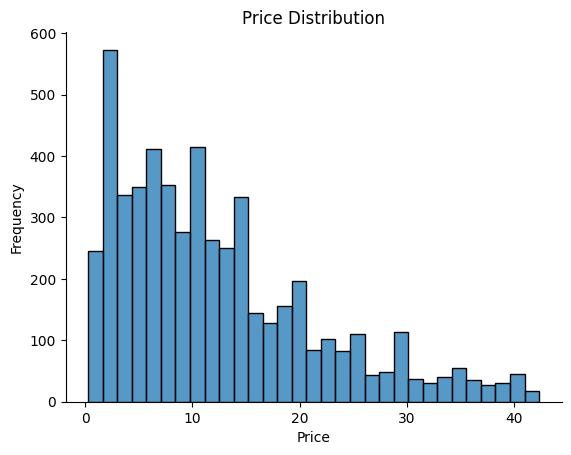

In [424]:
ax = sns.histplot(df['price'])

ax.set(xlabel ="Price", 
                ylabel = "Frequency",
                )
ax.set_title('Price Distribution')
sns.despine()

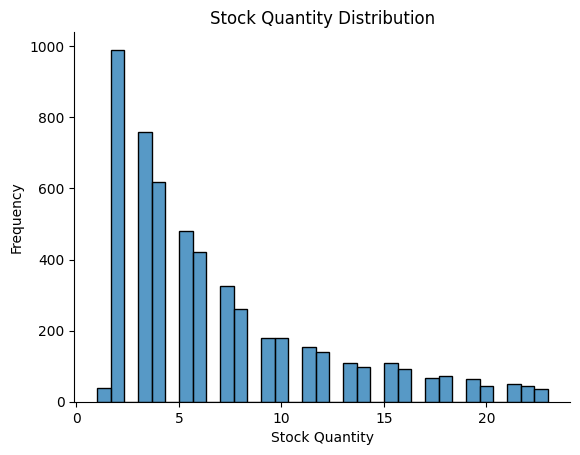

In [425]:
ax = sns.histplot(df['stock_quant'])

ax.set(xlabel ="Stock Quantity", 
                ylabel = "Frequency",
                )
ax.set_title('Stock Quantity Distribution')
sns.despine()



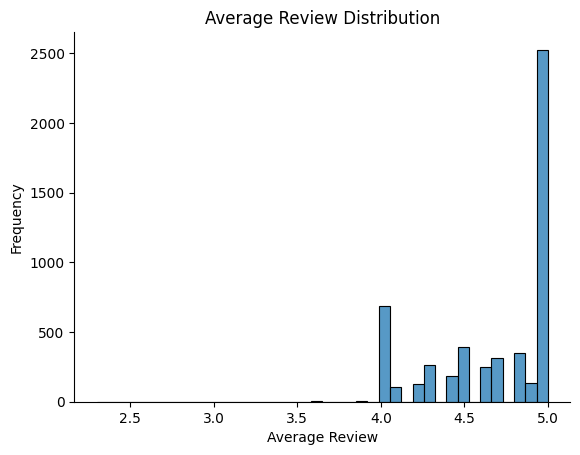

In [426]:
ax = sns.histplot(df['avg_rating'])

ax.set(xlabel ="Average Review", 
                ylabel = "Frequency",
                )
ax.set_title('Average Review Distribution')
sns.despine()

### Upon further analysis...
Average review has a negatively skewed distribution, 
Stock quantity and price have a positively skewed distribution.

In order to satisfy the assumptions for regression analysis, these attributes need to follow a more normal distribution. 
For negatively skewed data, squaring or cubing data should help to normalize the distribution. 
For positively skewed data, log or square root transformation is best suited to fix symmetry. 

Average rating also needs to be recoded for linear regression. Groups will be presented as follows:
0-1
1-2
2-3
3-4
4-5
or 

0-0.5
0.5-1
1-1.5
1.5-2
2-2.5
2.5-3
3-3.5
3.5-4
4-4.5
4.5-5

In [427]:
df['log_price']=np.log(df['price'])
df['sqrt_stock_quant']=np.sqrt(df['stock_quant'])
df['log_stock_quant']=np.log(df['stock_quant'])
df['sq_avg_rating']=(df['avg_rating']**2)
df['cube_avg_rating']=(df['avg_rating']**3)



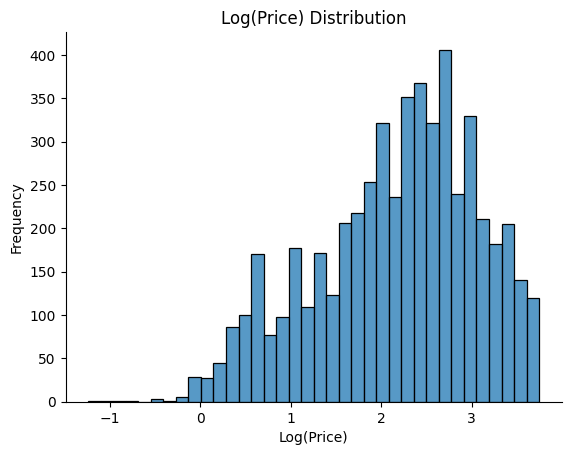

In [428]:
ax = sns.histplot(df['log_price'])

ax.set(xlabel ="Log(Price)", 
                ylabel = "Frequency",
                )
ax.set_title('Log(Price) Distribution')
sns.despine()

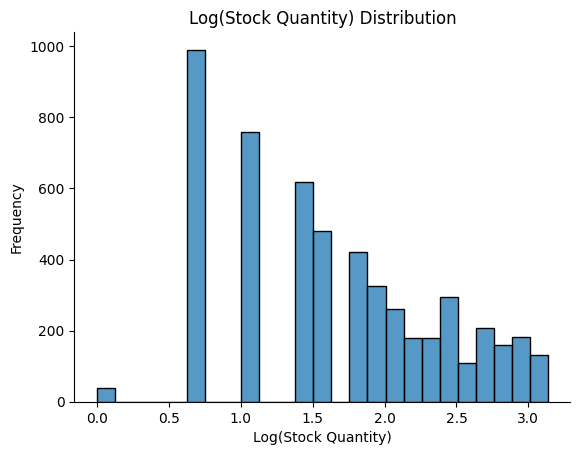

In [429]:
ax = sns.histplot(df['log_stock_quant'])

ax.set(xlabel ="Log(Stock Quantity)", 
                ylabel = "Frequency",
                )
ax.set_title('Log(Stock Quantity) Distribution')
sns.despine()

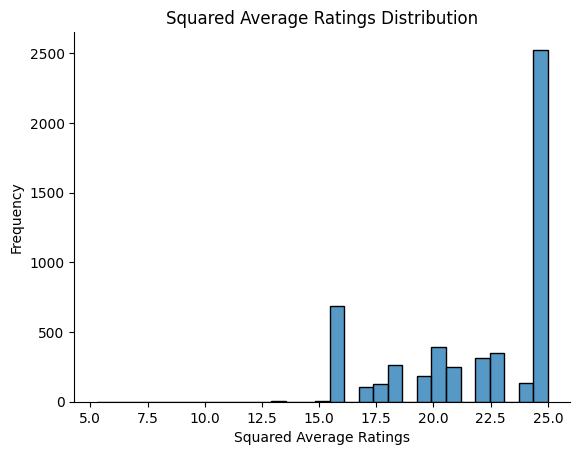

In [430]:
ax = sns.histplot(df['sq_avg_rating'])

ax.set(xlabel ="Squared Average Ratings", 
                ylabel = "Frequency",
                )
ax.set_title('Squared Average Ratings Distribution')
sns.despine()

# Data Visualisation 
## Scatter plot to visualise relationship between attributes
df['log_price']
df['sqrt_stock_quant']=np.sqrt(df['stock_quant'])

df['sq_avg_rating']=(df['avg_rating']**2)

### Price VS Rating
We can see here there there is a heavy outlier in price which skewed the distribution

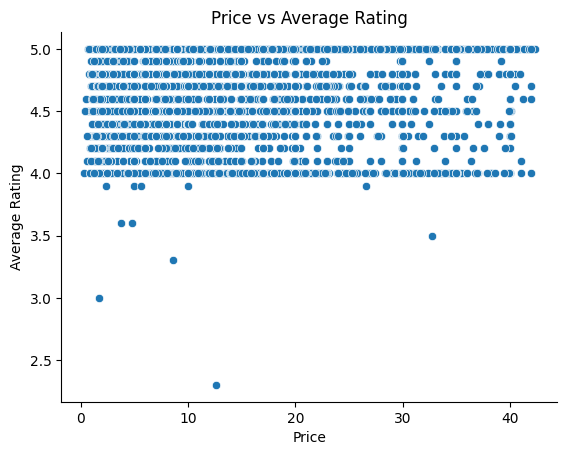

In [431]:
fig = plt.figure()

ax = sns.scatterplot(data = df,
                x = 'price', 
                y = 'avg_rating')
ax.set(title = 'Price vs Average Rating', 
       ylabel = 'Average Rating', 
       xlabel='Price')
sns.despine()



### Stock Quantity VS Rating

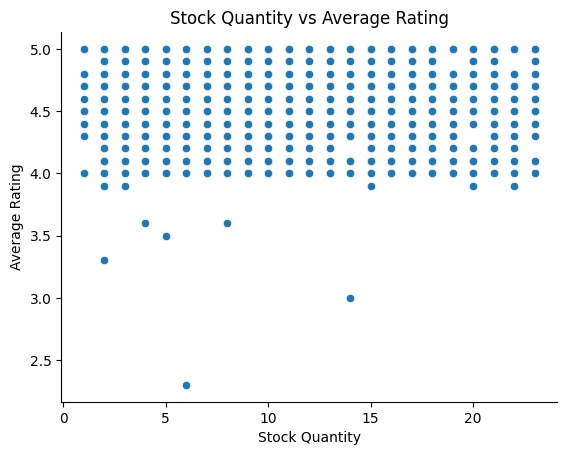

In [432]:
fig = plt.figure()

ax = sns.scatterplot(data = df,
                x = 'stock_quant', 
                y = 'avg_rating')
ax.set(title = 'Stock Quantity vs Average Rating', 
       ylabel = 'Average Rating', 
       xlabel='Stock Quantity')
sns.despine()

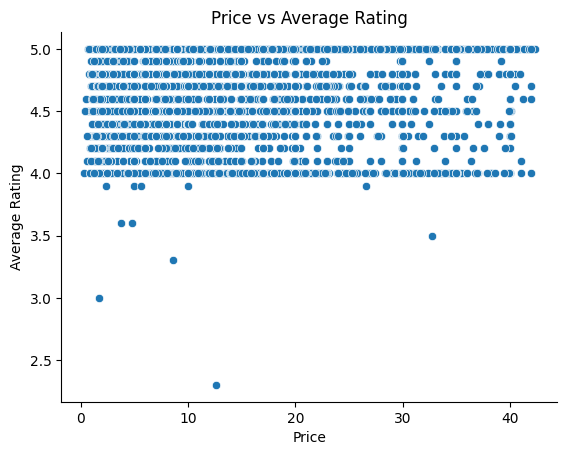

In [433]:
fig = plt.figure()

ax = sns.scatterplot(data = df,
                x = 'price', 
                y = 'avg_rating')
ax.set(title = 'Price vs Average Rating', 
       ylabel = 'Average Rating', 
       xlabel='Price')
sns.despine()

[Text(0.5, 1.0, 'Price vs Average Rating'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Average Rating')]

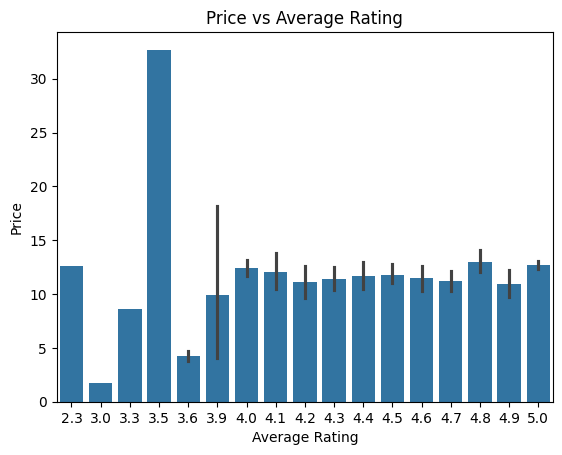

In [434]:
ax= sns.barplot(x = df['avg_rating'],
            y = df['price'],
            data = df)
ax.set(title = 'Price vs Average Rating', 
       ylabel = 'Price', 
       xlabel='Average Rating')

[Text(0.5, 1.0, 'Stock Quantity vs Average Rating'),
 Text(0, 0.5, 'Stock'),
 Text(0.5, 0, 'Average Rating')]

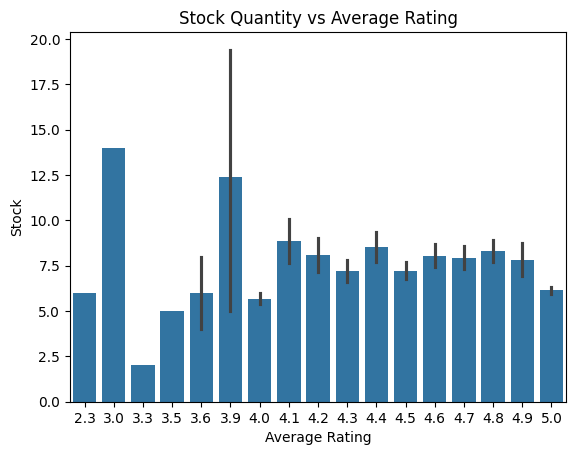

In [435]:
ax= sns.barplot(x = df['avg_rating'],
            y = df['stock_quant'],
            data = df)
ax.set(title = 'Stock Quantity vs Average Rating', 
       ylabel = 'Stock', 
       xlabel='Average Rating')

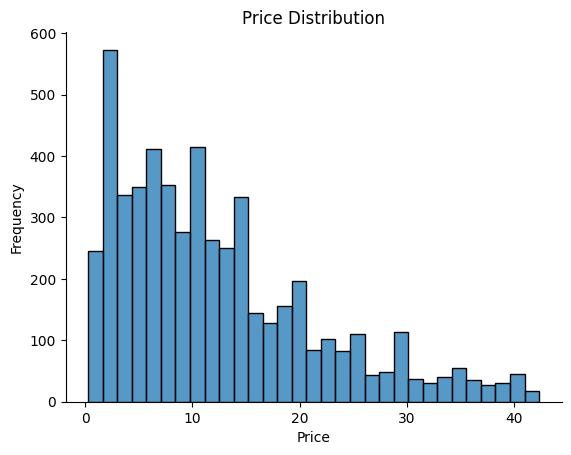

In [436]:
ax = sns.histplot(df['price'])

ax.set(xlabel ="Price", 
                ylabel = "Frequency",
                )
ax.set_title('Price Distribution')
sns.despine()

## Recoding Average Ratings
0-0.5
0.5-1
1-1.5
1.5-2
2-2.5
2.5-3
3-3.5
3.5-4
4-4.5
4.5-5

In [437]:
#df['recoded_ratings'] = pd.cut(df['ratings'], bins=[0, 1, 2, 3, 4, 5], labels=['0-1', '1-2', '2-3', '3-4', '4-5'])
labels= ['0-0.5','0.5-1','1-1.5','1.5-2','2-2.5','2.5-3','3-3.5','3.5-4','4-4.5','4.5-5']
df['recoded_ratings'] = pd.cut(df['avg_rating'], bins=10, labels=labels)

df_binary = pd.get_dummies(df['recoded_ratings'])
df = df.join(df_binary)



In [438]:
df.head()


,product_name,manufacturer,price,stock_quant,num_reviews,avg_rating,log_price,sqrt_stock_quant,log_stock_quant,sq_avg_rating,...,0-0.5,0.5-1,1-1.5,1.5-2,2-2.5,2.5-3,3-3.5,3.5-4,4-4.5,4.5-5
0,Hornby 2014 Catalogue,Hornby,3.42,5,15,4.9,1.229641,2.236068,1.609438,24.01,...,False,False,False,False,False,False,False,False,False,True
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2,17,3.9,2.301585,1.414214,0.693147,15.21,...,False,False,False,False,False,True,False,False,False,False
10,Hornby Gauge Railroad Mosley Tarmacadam Locomo...,Hornby,27.49,6,1,5.0,3.313822,2.449490,1.791759,25.00,...,False,False,False,False,False,False,False,False,False,True
12,Bachmann 37-662 14 Ton Tank Wagon Pease & Part...,Bachmann,9.60,2,1,5.0,2.261763,1.414214,0.693147,25.00,...,False,False,False,False,False,False,False,False,False,True
21,Preiser 30414 Horse Drawn Liquid Manure Wagon,Preiser,24.50,2,1,5.0,3.198673,1.414214,0.693147,25.00,...,False,False,False,False,False,False,False,False,False,True


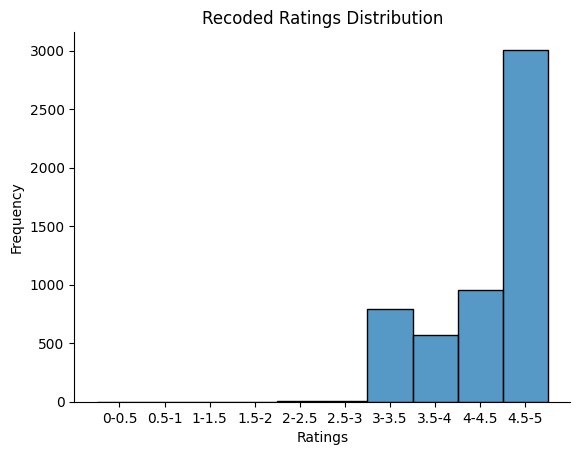

In [439]:
ax = sns.histplot(df['recoded_ratings'])

ax.set(xlabel ="Ratings", 
                ylabel = "Frequency",
                )
ax.set_title('Recoded Ratings Distribution')
sns.despine()

In [440]:
df['recoded_ratings'].value_counts()



recoded_ratings
4.5-5    3007
4-4.5     953
3-3.5     790
3.5-4     572
2.5-3       5
2-2.5       3
0-0.5       1
1-1.5       1
1.5-2       1
0.5-1       0
Name: count, dtype: int64

# Data Analysis + Insights

In [441]:
import pingouin as pg

#pg.linear_regress(independent (predictor), dependent (outcome))
model = pg.linear_regression(df[['log_price']], df['log_stock_quant'])
model

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1.612324,0.026183,61.578951,0.000000,0.000531,0.000343,1.560994,1.663653
1,log_price,0.018741,0.011138,1.682539,0.092523,0.000531,0.000343,-0.003095,0.040577


In [442]:
model2 = pg.linear_regression(df[labels], df['log_price'])
model2

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-9.371892e+12,0.166386,-5.632607e+13,0.0,0.005006,0.003323,-9.371892e+12,-9.371892e+12
1,0-0.5,9.371892e+12,0.808531,1.159125e+13,0.0,0.005006,0.003323,9.371892e+12,9.371892e+12
2,1-1.5,9.371892e+12,0.808531,1.159125e+13,0.0,0.005006,0.003323,9.371892e+12,9.371892e+12
3,1.5-2,9.371892e+12,0.808531,1.159125e+13,0.0,0.005006,0.003323,9.371892e+12,9.371892e+12
4,2-2.5,9.371892e+12,0.486173,1.927688e+13,0.0,0.005006,0.003323,9.371892e+12,9.371892e+12
5,2.5-3,9.371892e+12,0.391014,2.396816e+13,0.0,0.005006,0.003323,9.371892e+12,9.371892e+12
6,3-3.5,9.371892e+12,0.168751,5.553682e+13,0.0,0.005006,0.003323,9.371892e+12,9.371892e+12
7,3.5-4,9.371892e+12,0.169643,5.524463e+13,0.0,0.005006,0.003323,9.371892e+12,9.371892e+12
8,4-4.5,9.371892e+12,0.168349,5.566946e+13,0.0,0.005006,0.003323,9.371892e+12,9.371892e+12
9,4.5-5,9.371892e+12,0.167011,5.611546e+13,0.0,0.005006,0.003323,9.371892e+12,9.371892e+12


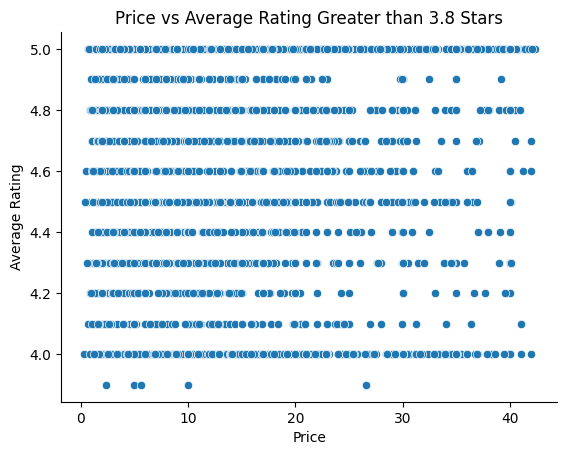

In [443]:
filter=df['avg_rating']>3.8
x=df[filter]['price']
y=df[filter]['avg_rating']

fig = plt.figure()

ax = sns.scatterplot(data = df[filter],
                x = x, 
                y = y)
ax.set(title = 'Price vs Average Rating Greater than 3.8 Stars', 
       ylabel = 'Average Rating', 
       xlabel='Price')
sns.despine()